## <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 10 Pre-class Assignment: Graph Theory and Cell Towers

In this pre-class assignment you will work to develop a program to generate a graph from a set of points on an XY-plane using the nearest neighbor graphing algorithm. This will set the stage for work that we will do in-class where you will work with your group to solve the problem of assigning cell phone tower frequencies

## Goals for today's pre-class assignment

1. Make a simple Graph Theory graph using matplotlib
1. Create a function for finding the nearest neighbor for a given node in a graph.
1. Experiment with the `networkx` module

## Assignment instructions
**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" dropbox folder in the Desire2Learn website.

**Notes about the assignment**: The most important pieces of this assignment are Steps 1 and 2. Step 3 might be a bit challenging because you have to figure out the right syntax to get the NetworkX module to work. Feel free to discuss issues you run into with others on Slack. It's OK if you can't get Part 3 figured out before class as long as you've tried it. Make sure you complete the final part of the assignment where you're asked to come up with an outline for how you would solve the cell phone tower problem.

---
# Defining the problem

The signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="500px"><p style="text-align: right;">From: http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "500px"><p style="text-align: right;">From:  http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State. (Note: this map may have changed since the time it was first created.)

<img src='https://i.imgur.com/oUuUDCH.jpg' width = "500px">
<p style="text-align: right;">From: http://www.antennasearch.com/</p>

Another problem is that cellphone companies have to pay for each frequency range they use.  So they would like minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

Between this pre-class assignment and the assignment you'll do in class, we'll try to solve this cell phone tower problem using Graph Theory!

# Step 1: Generate random cell towers. 

To start out, we're going to keep things simple and use artificial data to create our cell phone tower network. Specifically, we'll just populate a network of towers randomly.

**Write a function** to randomly create a 2D numpy array with $N$ rows representing cell towers and 2 columns representing the $x$ (longitude) and $y$ (latitude) positions of the cell towers on a map. You may assume that the map is a 2D plane and not a sphere. You can also assume that the "latitude" and "longitude" values are all in the range of 0 to 1.

In [1]:
# Put your code here.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import seaborn as sns

def createTowers(n):
    xAr = np.random.rand(n, 2)
    return xAr

Generate $N=50$ towers using your above function and plot the results as a scatter plot

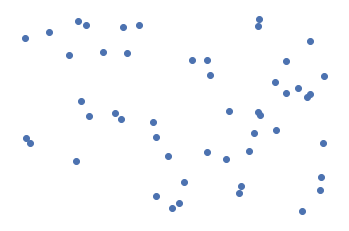

In [2]:
# Put your code here.
cellTowerStart = createTowers(50)
sns.set()
plt.scatter(cellTowerStart[:, 0], cellTowerStart[:,1]); 
plt.axis(False)
plt.show()

# Step 2: Nearest Neighbor Graph
Next **write a function that returns an adjacency list** (implemented as a dictionary of lists) from this set of points using the Nearest Neighbor Graph algorithm.  More information about the algorithm can be found here:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

Basically the algorithm should loop though all of the points and find the nearest neighbor to each point. To do this, you can use the `distance` function that is provide below, or you can take your own approach.

In [3]:
import math
# Function for computing the distance between two points
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Put your nearest neighbor graph function here
def graphTowers(xAr):
    G = nx.Graph()
    nTowers = xAr.shape[0]
    distanceMatrix = np.zeros((nTowers, nTowers))
    
    for i in range(nTowers):
        for j in range(nTowers):
            if i != j:
                distanceMatrix[i, j] = distance([xAr[i, 0], xAr[i, 1]], [xAr[j, 0], xAr[j, 1]])
            else:
                distanceMatrix[i, j] = 999
    
    for col in range(nTowers):
        minPoint = np.where( distanceMatrix[:, col] == distanceMatrix[:, col].min())
        G.add_edge(col, int(minPoint[0]))
        
    fig, ax = plt.subplots(figsize = (15, 15))
    nx.draw_networkx(G, pos = xAr, ax = ax)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    ax.set_title("Cell Tower - Nearest Neighbors")
    plt.show()

Run your nearest neighbor graphing function on the points you generated in step 1.  Generate a plot of the points and include the 
edges of the graph. Your plot should look something like the following:

<img src="https://i.imgur.com/WRgQ7UQ.png">


# Step 3: Graph Coloring

Now that we have a graph representing the towers closest to each other. Once thing that we can do is apply a graph coloring algorithm.  The colors will represent the frequencies.  We want to minimize the number of colors used and we want to minimize the number of cell towers that share an edge in the graph and have the same color.  

As you discovered in class, there is a package called "NetworkX" available in you Anaconda Python distribution, which can create graph objects *and* has built in coloring algorithms.

More information about Graph Coloring can be found here: https://en.wikipedia.org/wiki/Graph_coloring 

**Try using the `networkx` module to make a plot of your graph using the built in coloring algorithm.** You'll want to look at this documentation to figure this out, which you can find [here](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.coloring.greedy_color.html). If you can't get `networkx` and the graph coloring to work, make a note of it in the assignment wrap-up survey and be prepared to ask you classmates for help in class.

Even you can't get the coloring to work, at least try to make a graph of your points using `networkx`. **Don't get too hung up on this part, if you can't figure it out, try discussing it with other on Slack and bring your questions to class!**

If you can get it working, you should end up with something that looks like this:

<img src="https://i.imgur.com/ZYKbfmS.png">

**Important note**: Depending on the random points you end up with, you may end up with 3 colors instead of just 2, that's OK!

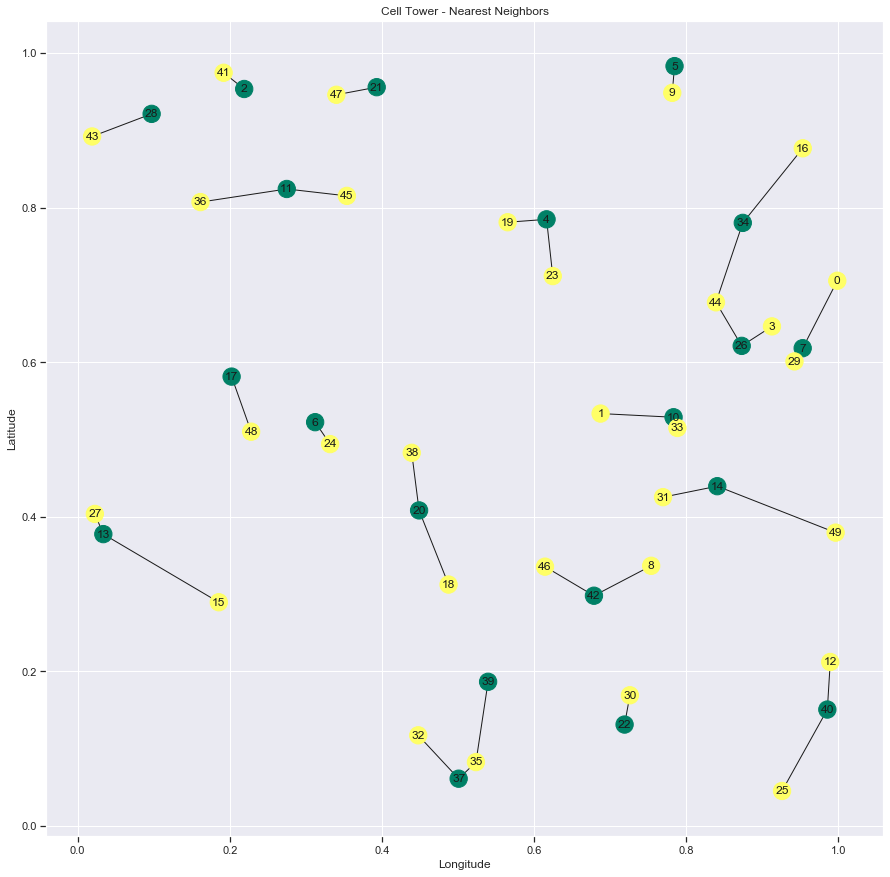

In [5]:
# Put networkx graph + coloring code here
def graphTowersColor(xAr):
    G = nx.Graph()
    nTowers = xAr.shape[0]
    distanceMatrix = np.zeros((nTowers, nTowers))
    
    for i in range(nTowers):
        for j in range(nTowers):
            if i != j:
                distanceMatrix[i, j] = distance([xAr[i, 0], xAr[i, 1]], [xAr[j, 0], xAr[j, 1]])
            else:
                distanceMatrix[i, j] = 999
    
    for col in range(nTowers):
        minPoint = np.where( distanceMatrix[:, col] == distanceMatrix[:, col].min())
        G.add_edge(col, int(minPoint[0]))
    
    colors = nx.greedy_color(G)
    nodeColors = []
    for i in G.nodes:
        nodeColors.append(colors[i])
    
    fig, ax = plt.subplots(figsize = (15, 15))
    nx.draw_networkx(G, pos = xAr, ax = ax, cmap = "summer", node_color = nodeColors)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    ax.set_title("Cell Tower - Nearest Neighbors")
    plt.show()
graphTowersColor(cellTowerStart)


---
# Preparing for the in-class assignment

Think about how you would solve the cell phone tower problem discussed in the beginning of the assignment.  Outline a program to do the following:

1. Upload cellphone tower data from http://www.antennasearch.com/ into our program. 
1. Generate a list of xy points from the longitude and latitude provided by the website.
1. Run the Nearest Neighbor graph algorithm to generate a graph.
1. Run a graph coloring algorithm on your graph. 
1. Plot the resulting map with points colored to represent the selected frequencies.

You can outline the program in the cell below using "stub" functions where you define the functions you think you'll need, what the inputs will be for the functions, and some comments for what the functions will do. If you end the function with ```pass```, Python will be able to successfully "run" your code. An example of what is meant by as stub function is included below. **This is just an outline to guide your thinking when you get to class, it doesn't have to be perfect!**

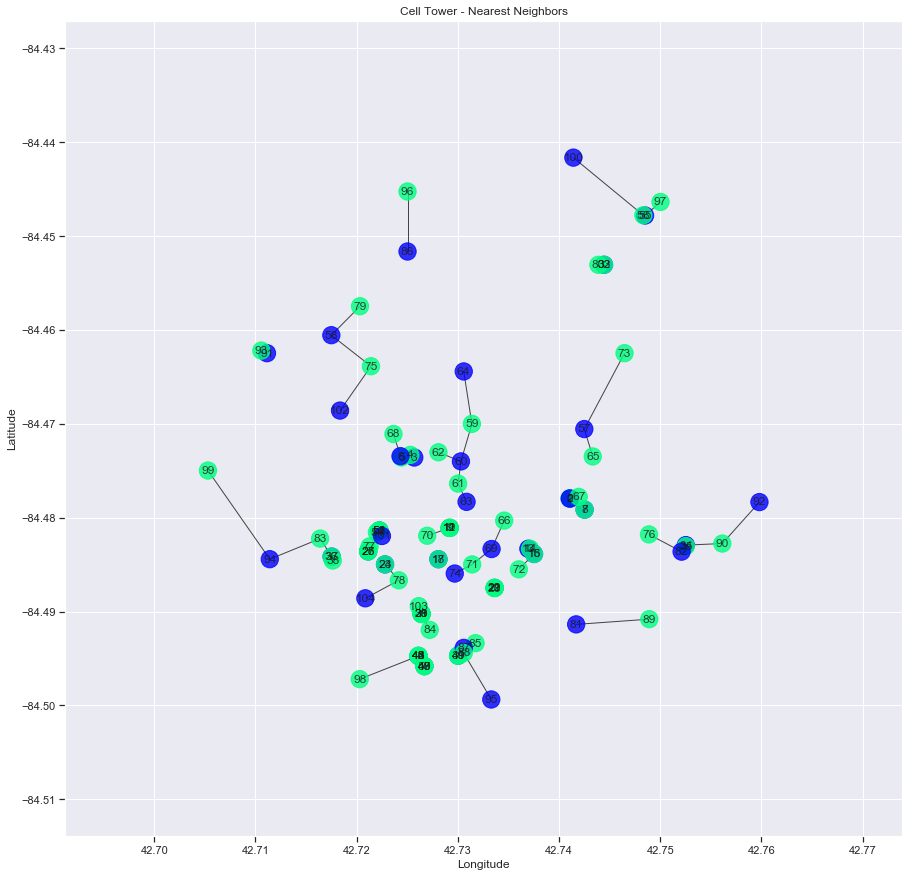

In [8]:
def importData(csvFile):
    posAr = np.loadtxt(csvFile, delimiter=",", skiprows=1, usecols=[2,3], unpack=False)
    return posAr

def graphTowersColor(xAr):
    G = nx.Graph()
    nTowers = xAr.shape[0]
    distanceMatrix = np.zeros((nTowers, nTowers))
    
    for i in range(nTowers):
        for j in range(nTowers):
            if i != j:
                distanceMatrix[i, j] = distance([xAr[i, 0], xAr[i, 1]], [xAr[j, 0], xAr[j, 1]])
            else:
                distanceMatrix[i, j] = 999
    
    for col in range(nTowers):
        minPoint = np.where( distanceMatrix[:, col] == distanceMatrix[:, col].min())
        G.add_edge(col, int(minPoint[0][0]))
    
    colors = nx.greedy_color(G)
    nodeColors = []
    for i in G.nodes:
        nodeColors.append(colors[i])
    
    fig, ax = plt.subplots(figsize = (15, 15))
    nx.draw_networkx(G, pos = xAr, ax = ax, cmap = "winter", node_color = nodeColors, alpha = 0.8)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    ax.set_title("Cell Tower - Nearest Neighbors")
    plt.show()

posAr = importData("TransmitterData.csv")
graphTowersColor(posAr)


----
# Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [97]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for this assignment's submission folder (Don't forget to add your names in the first cell).

&#169; Copyright 2018,  Michigan State University Board of Trustees